In [1]:
import pandas as pd

In [31]:
steve = pd.read_csv("steve.csv")
real = pd.read_csv("real.csv")
df = pd.concat([steve, real])
df["video_publish_date"] = pd.to_datetime(df["video_publish_date"]).dt.date

In [32]:
df[["channel_title", "video_view_count", "video_comment_count", "video_like_count"]].groupby("channel_title").mean()

,video_view_count,video_comment_count,video_like_count
channel_title,,,
Real Engineering,2.389255e+06,3567.884615,66542.384615
Steve Mould,2.595123e+06,1878.077670,83812.614887


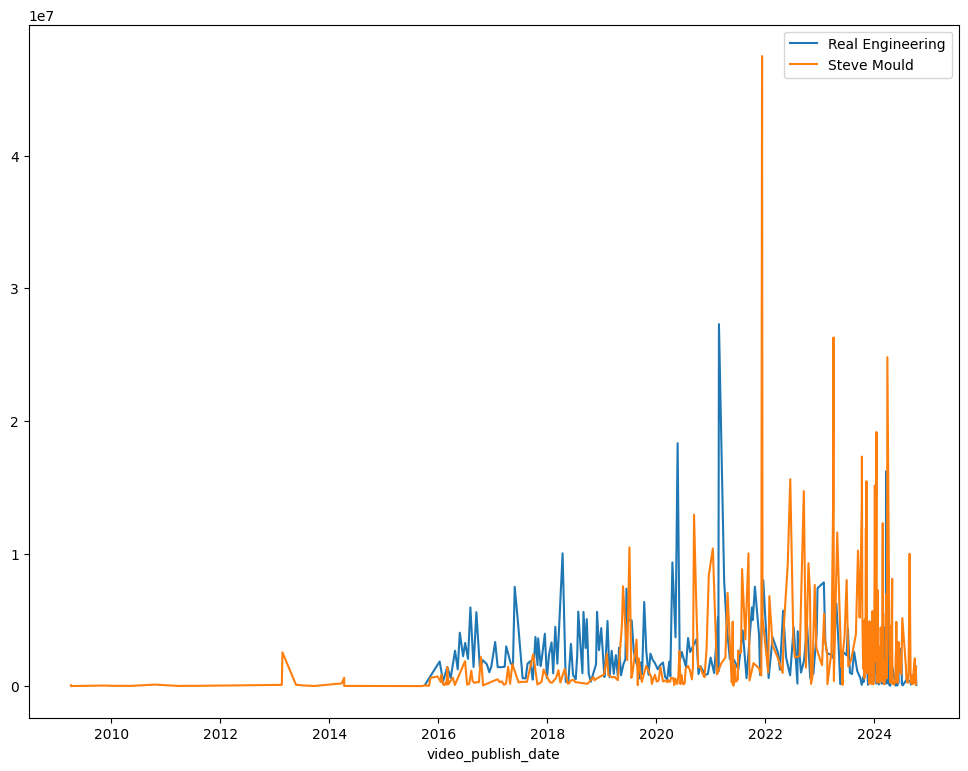

In [34]:
(
    df
    .set_index("video_publish_date")
    .sort_index()
    .groupby("channel_title")["video_view_count"]
    .plot(legend=True, figsize=(12, 9))
);

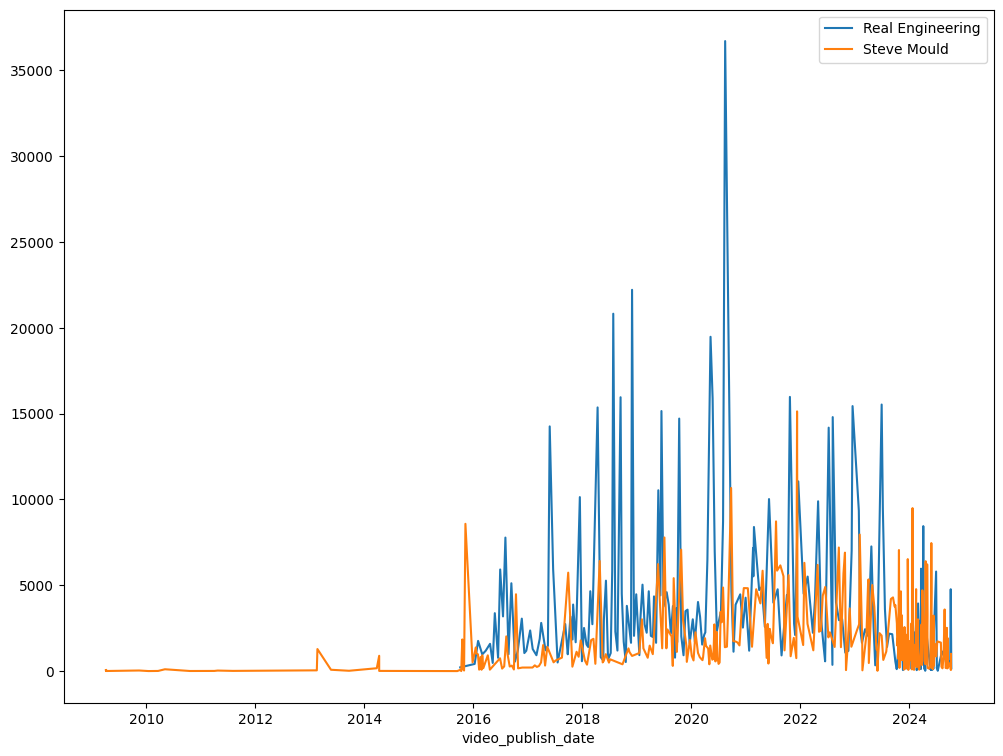

In [35]:
(
    df
    .set_index("video_publish_date")
    .sort_index()
    .groupby("channel_title")["video_comment_count"]
    .plot(legend=True, figsize=(12, 9))
);

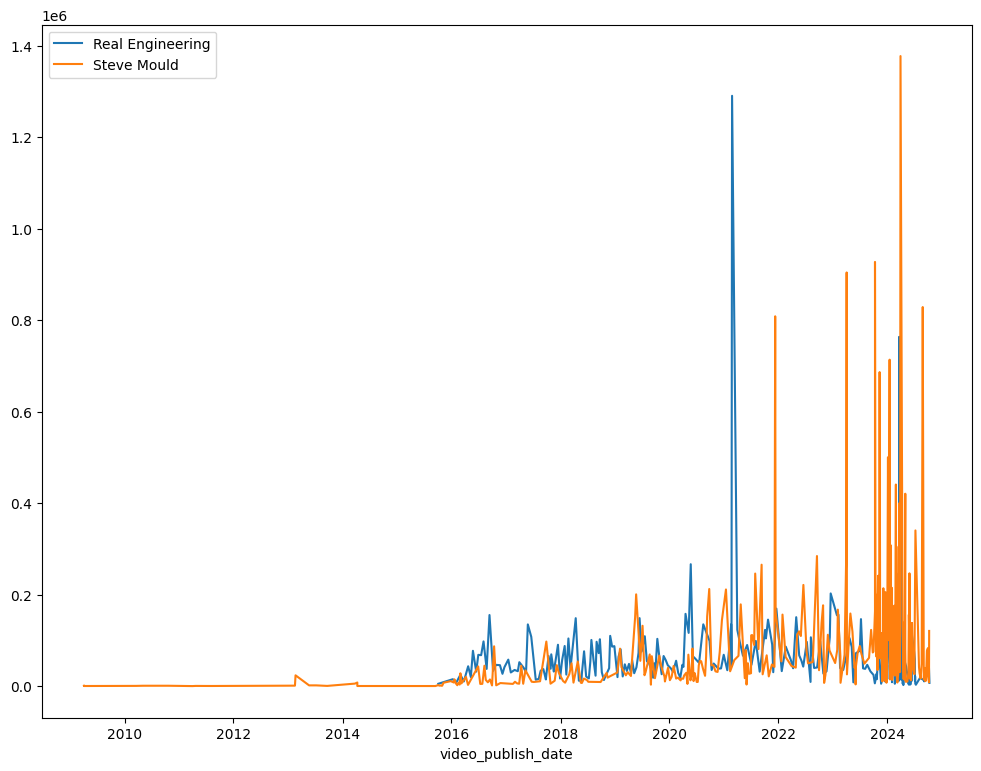

In [36]:
(
    df
    .set_index("video_publish_date")
    .sort_index()
    .groupby("channel_title")["video_like_count"]
    .plot(legend=True, figsize=(12, 9))
);